# League of Legends Game Outcome Predictor
This is work done by Frank Rodriguez and Michael Seman to create a model to predict the outcome of a League of Legends game based on the team stats at 10 minutes.

Link - https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## Goal:
Our goal is to train a binary classification ML model to accurately predict the winner of a league of legends game, given the team stats at the 10 minute mark of the game.  blueWins is our target variable.  0 means a red win, 1 means a blue win.

In [ ]:
# loading basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
df = pd.read_csv('https://raw.githubusercontent.com/michaelseman/mydatasets/main/high_diamond_ranked_10min.csv')
# allowing all columns to be viewed.
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

# Preliminary EDA

In [ ]:
# Looking at the first 5 records of the dataframe

df.head()

# our target column is blueWins

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [ ]:
# Inspecting dataset and looking for nulls and check data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
# After examining the data, we see many redundant/100% correlated columns columns because of how the data was recorded.  
# These will be removed later in data cleaning.

df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [ ]:
# Dropping the gameId column 
df = df.drop(columns=['gameId'], axis=1)

In [ ]:
# Looking at Meta information for dataset
df.describe().T

count          mean          std      min  \
blueWins                      9879.0      0.499038     0.500024      0.0   
blueWardsPlaced               9879.0     22.288288    18.019177      5.0   
blueWardsDestroyed            9879.0      2.824881     2.174998      0.0   
blueFirstBlood                9879.0      0.504808     0.500002      0.0   
blueKills                     9879.0      6.183925     3.011028      0.0   
blueDeaths                    9879.0      6.137666     2.933818      0.0   
blueAssists                   9879.0      6.645106     4.064520      0.0   
blueEliteMonsters             9879.0      0.549954     0.625527      0.0   
blueDragons                   9879.0      0.361980     0.480597      0.0   
blueHeralds                   9879.0      0.187974     0.390712      0.0   
blueTowersDestroyed           9879.0      0.051422     0.244369      0.0   
blueTotalGold                 9879.0  16503.455512  1535.446636  10730.0   
blueAvgLevel                  9879.0      6.916004     0.305146      4.6   
blueTotalExperience           9879.0  17928.110133  1200.523764  10098.0   
blueTotalMinionsKilled        9879.0    216.699565    21.858437     90.0   
blueTotalJungleMinionsKilled  9879.0     50.509667     9.898282      0.0   
blueGoldDiff                  9879.0     14.414111  2453.349179 -10830.0   
blueExperienceDiff            9879.0    -33.620306  1920.370438  -9333.0   
blueCSPerMin                  9879.0     21.669956     2.185844      9.0   
blueGoldPerMin                9879.0   1650.345551   153.544664   1073.0   
redWardsPlaced                9879.0     22.367952    18.457427      6.0   
redWardsDestroyed             9879.0      2.723150     2.138356      0.0   
redFirstBlood                 9879.0      0.495192     0.500002      0.0   
redKills                      9879.0      6.137666     2.933818      0.0   
redDeaths                     9879.0      6.183925     3.011028      0.0   
redAssists                    9879.0      6.662112     4.060612      0.0   
redEliteMonsters              9879.0      0.573135     0.626482      0.0   
redDragons                    9879.0      0.413098     0.492415      0.0   
redHeralds                    9879.0      0.160036     0.366658      0.0   
redTowersDestroyed            9879.0      0.043021     0.216900      0.0   
redTotalGold                  9879.0  16489.041401  1490.888406  11212.0   
redAvgLevel                   9879.0      6.925316     0.305311      4.8   
redTotalExperience            9879.0  17961.730438  1198.583912  10465.0   
redTotalMinionsKilled         9879.0    217.349226    21.911668    107.0   
redTotalJungleMinionsKilled   9879.0     51.313088    10.027885      4.0   
redGoldDiff                   9879.0    -14.414111  2453.349179 -11467.0   
redExperienceDiff             9879.0     33.620306  1920.370438  -8348.0   
redCSPerMin                   9879.0     21.734923     2.191167     10.7   
redGoldPerMin                 9879.0   1648.904140   149.088841   1121.2   

                                   25%      50%       75%      max  
blueWins                          0.00      0.0      1.00      1.0  
blueWardsPlaced                  14.00     16.0     20.00    250.0  
blueWardsDestroyed                1.00      3.0      4.00     27.0  
blueFirstBlood                    0.00      1.0      1.00      1.0  
blueKills                         4.00      6.0      8.00     22.0  
blueDeaths                        4.00      6.0      8.00     22.0  
blueAssists                       4.00      6.0      9.00     29.0  
blueEliteMonsters                 0.00      0.0      1.00      2.0  
blueDragons                       0.00      0.0      1.00      1.0  
blueHeralds                       0.00      0.0      0.00      1.0  
blueTowersDestroyed               0.00      0.0      0.00      4.0  
blueTotalGold                 15415.50  16398.0  17459.00  23701.0  
blueAvgLevel                      6.80      7.0      7.20      8.0  
blueTotalExperience     

In [ ]:
df.nunique()

blueWins                           2
blueWardsPlaced                  147
blueWardsDestroyed                27
blueFirstBlood                     2
blueKills                         21
blueDeaths                        21
blueAssists                       30
blueEliteMonsters                  3
blueDragons                        2
blueHeralds                        2
blueTowersDestroyed                5
blueTotalGold                   4739
blueAvgLevel                      17
blueTotalExperience             4143
blueTotalMinionsKilled           148
blueTotalJungleMinionsKilled      74
blueGoldDiff                    6047
blueExperienceDiff              5356
blueCSPerMin                     148
blueGoldPerMin                  4739
redWardsPlaced                   151
redWardsDestroyed                 25
redFirstBlood                      2
redKills                          21
redDeaths                         21
redAssists                        28
redEliteMonsters                   3
r

Note: Although the previous line of code shows what could be quite a few categorical columns, the timeframe in which the match statistics
were taken, turns variables that are continuous, but discrete and makes them look like something categorical. Examples of this would be red/blue Dragons as they spawn at 5:00 into the match and once killed it respawns every 5:00 so there is not really a chance to get more than one kill in 10 minutes.

In [ ]:
# Just checking on some possible categorical variables

print('blueFirstBlood ' + str(sorted(df['blueFirstBlood'].unique())))

blueFirstBlood [0, 1]


In [ ]:
print('redFirstBlood ' + str(sorted(df['redFirstBlood'].unique())))

redFirstBlood [0, 1]


In [ ]:
print('redTowersDestroyed ' + str(sorted(df['redTowersDestroyed'].unique())))

redTowersDestroyed [0, 1, 2]


In [ ]:
# The towers destroyed column is another one of those variables that may look like a categorical variable, but the time limit and the fact that
# there are only 9 towers in total explain this fact well

print('blueTowersDestroyed ' + str(sorted(df['blueTowersDestroyed'].unique())))

blueTowersDestroyed [0, 1, 2, 3, 4]


In [ ]:
# Double Checking for Null Values 
df.isnull().sum()

blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds                      0
redTowersDestr

In [ ]:
# Checking for target variable imbalance
df['blueWins'].value_counts()

0    4949
1    4930
Name: blueWins, dtype: int64

In [ ]:
df['blueWins'].value_counts(normalize=True)

0    0.500962
1    0.499038
Name: blueWins, dtype: float64

## Univariate Visualizations

Text(0.5, 1.0, 'blueWins distribution')

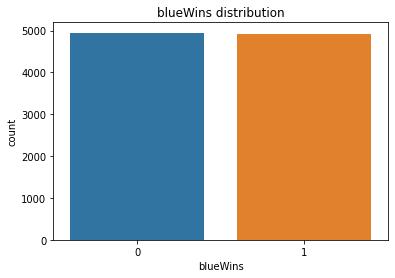

In [ ]:
# Visually checking target variable "imbalance" 

sns.countplot(x='blueWins', data = df)
plt.title('blueWins distribution')

In [ ]:
# exploring this column specifically for distribution of values
df['blueWardsPlaced'].nunique()
df['blueWardsPlaced'].unique()
pd.set_option('max_rows',90)

In [ ]:
df['blueWardsPlaced'].value_counts()

16     1255
15     1217
17      988
14      974
18      831
       ... 
165       1
120       1
148       1
111       1
137       1
Name: blueWardsPlaced, Length: 147, dtype: int64

In [ ]:
pd.set_option('max_rows',30)

# Initial Data Cleaning/Feature Selection
This section requires a bit of knowledge about the PC game League of Legends.  A lot of these columns are measuring the same exact thing and essentially just add clutter to the dataframe.  So we are going to remove that clutter now, before moving forward with more EDA.

Let's look at our columns:
- target = 'blueWins',

- dont need = 'gameId', 'blueEliteMonsters','redEliteMonsters',
- exist in another form = 'blueTotalGold', 'blueTotalExperience','blueCSPerMin', 'blueGoldPerMin', 'blueAvgLevel',
'redTotalGold', 'redTotalExperience','redCSPerMin', 'redGoldPerMin,'redAvgLevel',

- redundant = 'redGoldDiff','redExperienceDiff', 'redFirstBlood','redKills', 'redDeaths', 

- keepers = 'blueWardsPlaced', 'blueWardsDestroyed','blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds','blueTowersDestroyed',   'blueTotalMinionsKilled',
'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
'redWardsPlaced', 'redWardsDestroyed','redAssists', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled',

Explanations:

- The EliteMonsters column for both red and blue teams is just a total number of herald and dragon kills, we can remove both of these as we already have individual columns for each. We would rather track each variable separately as the dragon and herald work slightly different.
</br>
</br>
- We chose to evaluate the amount of gold for each team using one column - blueGoldDiff (which is the difference in each teams Gold count from the blue team's perpective, so negative values mean that the red team has that much more gold).  As a result we can remove the columns for TotalGold and GoldPerMin for both teams.
</br>
</br>
- We chose to evaluate experience with one column - blueExpDiff (which is the difference in each teams amount of experience points (EXP) from the blue teams perpective).  As a results we can eliminate TotalExperience, and AvgLevel. *Note* Levels are determined by the amount of experience points gained by each team member, so ExpDiff is essentially measuring the same metric as AvgLevel, which means they would be highly correlated with each other and we to eliminate as many of those types of variables as possible
</br>
</br>
- The same statistics exist for both teams. As a result, there are some values for one team that are essentially the inverse of another column for the other team. One example of this would be the fact that the value for blueKills (amount of times the blue team killed a member of the red team) would be the same value as redDeaths (amount of times the red team was killed by an opponent from the blue team). We chose to keep the blue team's version of those values. Other red team columns that we eliminated for the same reason: GoldDiff, ExperienceDiff, FirstBlood, Kills, and Deaths. *Note*: In League of Legends, FirstBlood (aka the first kill of the game) can only be achieved by one team.  So blueFirstBlood 1 means blue got the first kill, 0 means red got the first kill.  

In [ ]:
# Eliminating all the columns mentioned above in the sections: 'don't need', 'exist in another form', & 'redundant'

df = df.drop(columns=['blueTotalGold', 'blueTotalExperience', 'redFirstBlood','blueAvgLevel','redAvgLevel','blueCSPerMin',  'redKills','redDeaths', 'blueGoldPerMin','blueEliteMonsters','redEliteMonsters','redTotalExperience','redTotalGold','redGoldDiff','redExperienceDiff','redCSPerMin', 'redGoldPerMin'],  axis=1)

In [ ]:
# Checking columns left over after removing the columns in the code section above

df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled'],
      dtype='object')

In [ ]:
# Examining the first 5 values of the most updated dataframe

df.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
0           6           11            0            0                    0   
1           5            5            0            0                    0   
2          11            4            1            0                    0   
3           5            5            0            1                    0   
4           6            6            0            0                    0   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   blueExperienceDiff  redWardsPlaced  redWardsDestroyed  redAssists  \
0                  -8              15                  6           8   
1               -1173              12                  1           2   
2               -1033              15                  3          14   
3                  -7              15                  2          10   
4                 230              17                  2           7   

   redDragons  redHeralds  redTowersDestroyed  redTotalMinionsKilled  \
0           0           0                   0                    197   
1           1           1                   1                    240   
2           0           0                   0                    203   
3           0           0                   0                    235   
4           1           0                   0                    225   

   redTotalJungleMinionsKilled  
0                           55  
1                           52  
2                           28  
3                           47  
4                           67

# EDA cont.

## Univariate Visualizations cont.

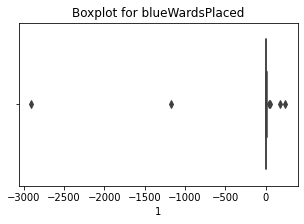

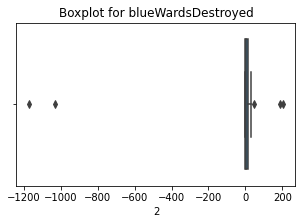

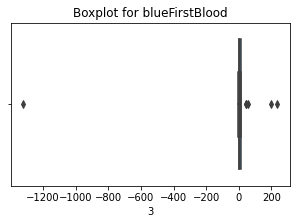

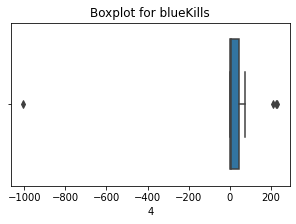

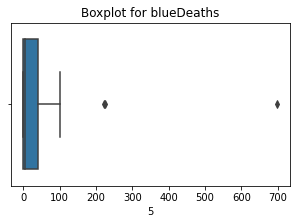

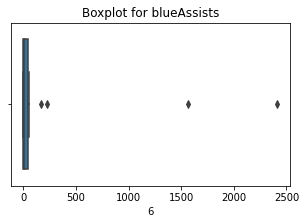

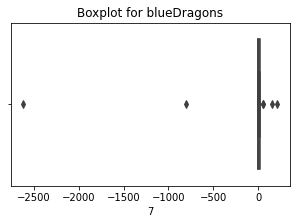

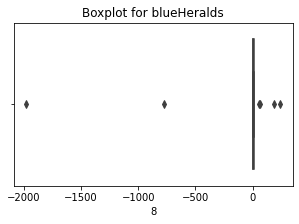

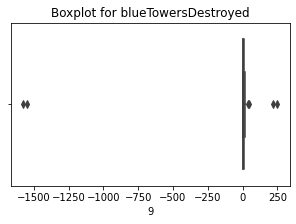

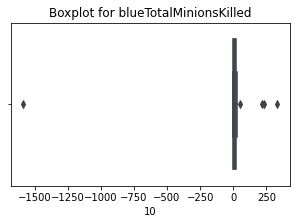

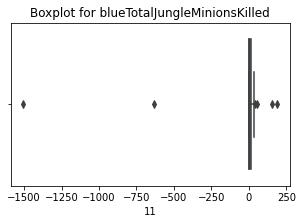

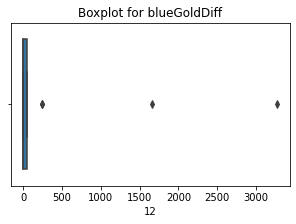

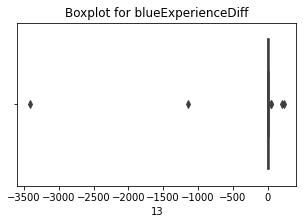

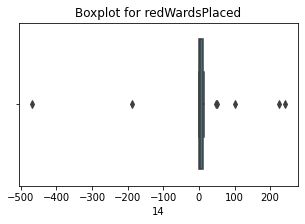

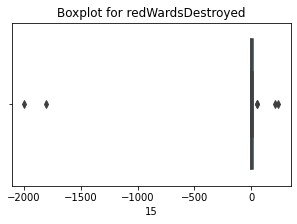

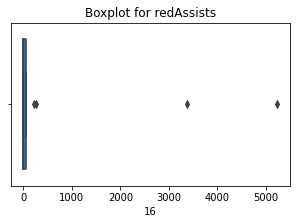

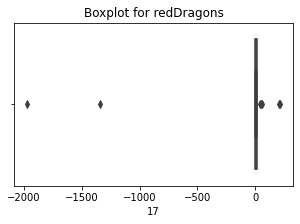

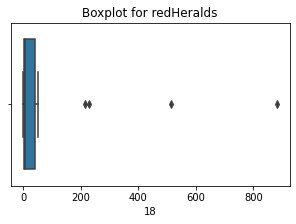

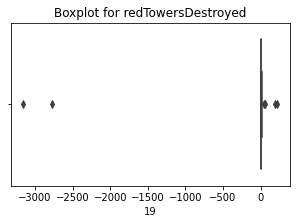

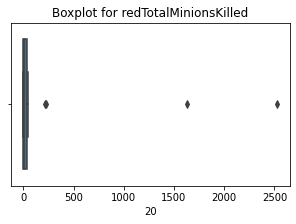

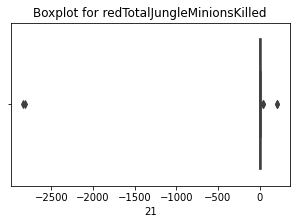

In [ ]:
# Using Box-Whisker Plots to identify outliers for each column

for column in range(1,len(df.columns)):
   plt.figure(figsize=(5,3))
   sns.boxplot(x=df.iloc[column])
   plt.title(f'Boxplot for {df.columns[column]}')
   plt.show()

## Bivariate Visualizations

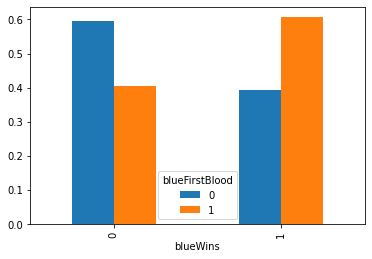

In [ ]:
# Showing the percentage of first blood sucess and failure and seeing its effects on winning or losing a match

pd.crosstab(df.blueWins, df.blueFirstBlood, normalize='index').plot.bar()

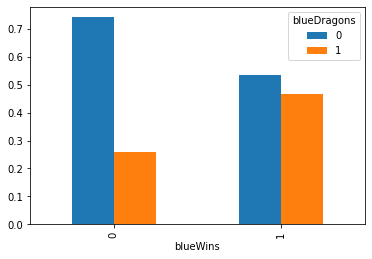

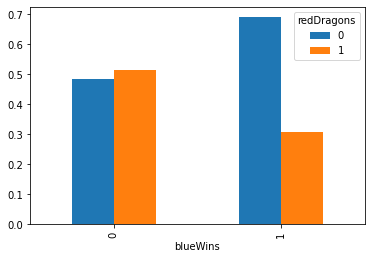

In [ ]:
# Showing the percentage of dragon kills for each team and showing its effect on winning the match
#

pd.crosstab(df.blueWins, df.blueDragons, normalize='index').plot.bar()
pd.crosstab(df.blueWins, df.redDragons, normalize='index').plot.bar()

In [ ]:
print(df.blueDragons.value_counts())
print(df.redDragons.value_counts())

0    6303
1    3576
Name: blueDragons, dtype: int64
0    5798
1    4081
Name: redDragons, dtype: int64


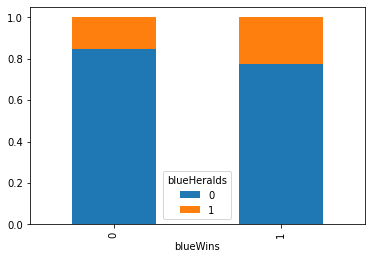

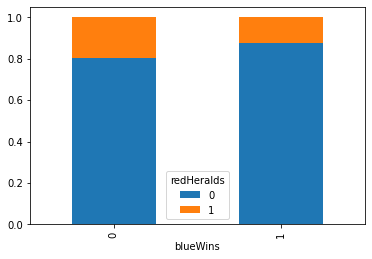

In [ ]:
# graphing heralds for each side, red/blue and how it breaks down with blue side winning. If it is even on both sides, the graphs should look the same but left and right swapped.
# It also shows how in these matches, whether a team killed the herald monster or not, 
# it did not have much of an effect on the outcome of match itself and we will see this later show up again as well

pd.crosstab(df.blueWins, df.blueHeralds, normalize='index').plot.bar(stacked=True)
pd.crosstab(df.blueWins, df.redHeralds, normalize='index').plot.bar(stacked=True)

In [ ]:
# herald seems to slightly favor 

# Look like the blue team got slightly more heralds throughout all the matches, 
# but again the graphs above show how it does not seem to have much of an effect on the match outcome 
print(df.blueHeralds.value_counts())
print(df.redHeralds.value_counts())

0    8022
1    1857
Name: blueHeralds, dtype: int64
0    8298
1    1581
Name: redHeralds, dtype: int64


## Multivariate Visualizations

In [ ]:
df.corr()

blueWins  blueWardsPlaced  blueWardsDestroyed  \
blueWins                      1.000000         0.000087            0.044247   
blueWardsPlaced               0.000087         1.000000            0.034447   
blueWardsDestroyed            0.044247         0.034447            1.000000   
blueFirstBlood                0.201769         0.003228            0.017717   
blueKills                     0.337358         0.018138            0.033748   
blueDeaths                   -0.339297        -0.002612           -0.073182   
blueAssists                   0.276685         0.033217            0.067793   
blueDragons                   0.213768         0.017676            0.040504   
blueHeralds                   0.092385         0.010104            0.016940   
blueTowersDestroyed           0.115566         0.009462           -0.009150   
blueTotalMinionsKilled        0.224909        -0.033925            0.111028   
blueTotalJungleMinionsKilled  0.131445         0.010501           -0.023452   
blueGoldDiff                  0.511119         0.015800            0.078585   
blueExperienceDiff            0.489558         0.027943            0.077946   
redWardsPlaced               -0.023671        -0.012906            0.135966   
redWardsDestroyed            -0.055400         0.115549            0.123919   
redAssists                   -0.271047        -0.009009           -0.046212   
redDragons                   -0.209516        -0.020121           -0.034439   
redHeralds                   -0.097172        -0.011964           -0.012712   
redTowersDestroyed           -0.103696        -0.008225           -0.023943   
redTotalMinionsKilled        -0.212171        -0.012395            0.040023   
redTotalJungleMinionsKilled  -0.110994         0.001224           -0.035732   

                              blueFirstBlood  blueKills  blueDeaths  \
blueWins                            0.201769   0.337358   -0.339297   
blueWardsPlaced                     0.003228   0.018138   -0.002612   
blueWardsDestroyed                  0.017717   0.033748   -0.073182   
blueFirstBlood                      1.000000   0.269425   -0.247929   
blueKills                           0.269425   1.000000    0.004044   
blueDeaths                         -0.247929   0.004044    1.000000   
blueAssists                         0.229485   0.813667   -0.026372   
blueDragons                         0.134309   0.170436   -0.188852   
blueHeralds                         0.077509   0.076195   -0.095527   
blueTowersDestroyed                 0.083316   0.180314   -0.071441   
blueTotalMinionsKilled              0.125642  -0.030880   -0.468560   
blueTotalJungleMinionsKilled        0.018190  -0.112506   -0.228102   
blueGoldDiff                        0.378511   0.654148   -0.640000   
blueExperienceDiff                  0.240665   0.583730   -0.577613   
redWardsPlaced                     -0.019142  -0.034239    0.008102   
redWardsDestroyed                  -0.043304  -0.092278    0.038672   
redAssists                         -0.201140  -0.020344    0.804023   
redDragons                         -0.135327  -0.207949    0.150746   
redHeralds                         -0.060246  -0.104423    0.076639   
redTowersDestroyed                 -0.069584  -0.082491    0.156780   
redTotalMinionsKilled              -0.156711  -0.472203   -0.040521   
redTotalJungleMinionsKilled        -0.024559  -0.214454   -0.100271   

                              blueAssists  blueDragons  blueHeralds  \
blueWins                         0.276685     0.213768     0.092385   
blueWardsPlaced                  0.033217     0.017676     0.010104   
blueWardsDestroyed               0.067793     0.040504     0.016940   
blueFirstBlood                   0.229485     0.134309     0.077509   
blueKills                        0.813667     0.170436     0.076195   
blueDeaths                      -0.026372    -0.188852    -0.095527   
blueAssists                      1.000000     0.170873     0.028434   
blueDragon

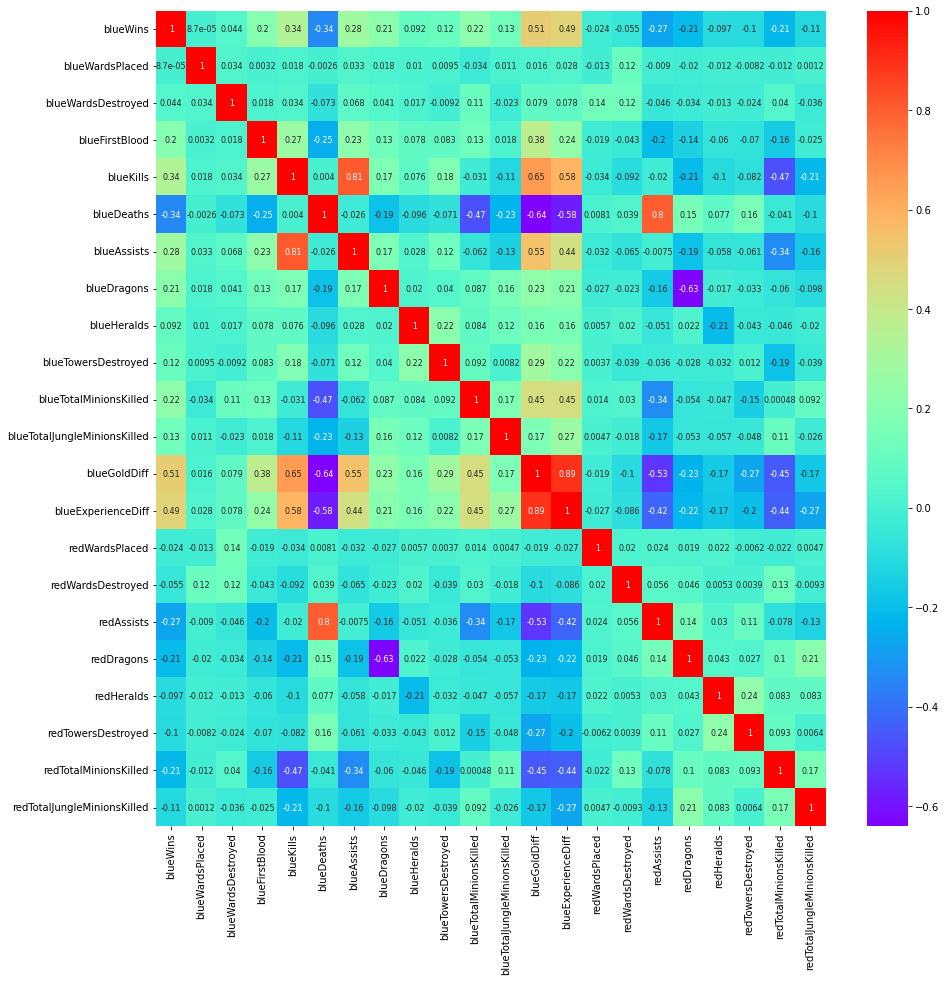

In [ ]:
plt.figure(figsize=(15, 15)) # old cmap value RdYlGn
sns.heatmap(df.corr(), annot=True, cmap="rainbow", annot_kws={"size":8})

In [ ]:
!pip install hvplot
import hvplot.pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 9.0 MB/s 


In [ ]:
hvplot.extension('bokeh')
df.drop('blueWins', axis=1).corrwith(df.blueWins).hvplot.barh()

:Bars   [index]   (0)

### Correlation Conclusions
- With respect to wins: The predictors with the highest correlation to wins in order are: GoldDiff, ExpDiff, Deaths/Kills, Assists, TotalMinionsKilled, Dragons.

- Gold is slighty more important that Experience point for winning

- It is not explicitly a zero sum gain with Dragons and Heralds.  There is only 1 of each monster available to be fight and then use before 10 minutes. With that in mind, if one team kills one, it will not appear again within the 10-minute time frame our data shows. However, there is a possibility that neither team will be able to take either objective.

- Assists require Kills to happen, but a kill can result in multiple or no assists.

- Placing wards seems to be the least correlated factor with wins

# Data Cleaning cont.

In [ ]:
# Checking for duplicates
df.duplicated().sum()

0

## Checking Distribution / Outlier Removal

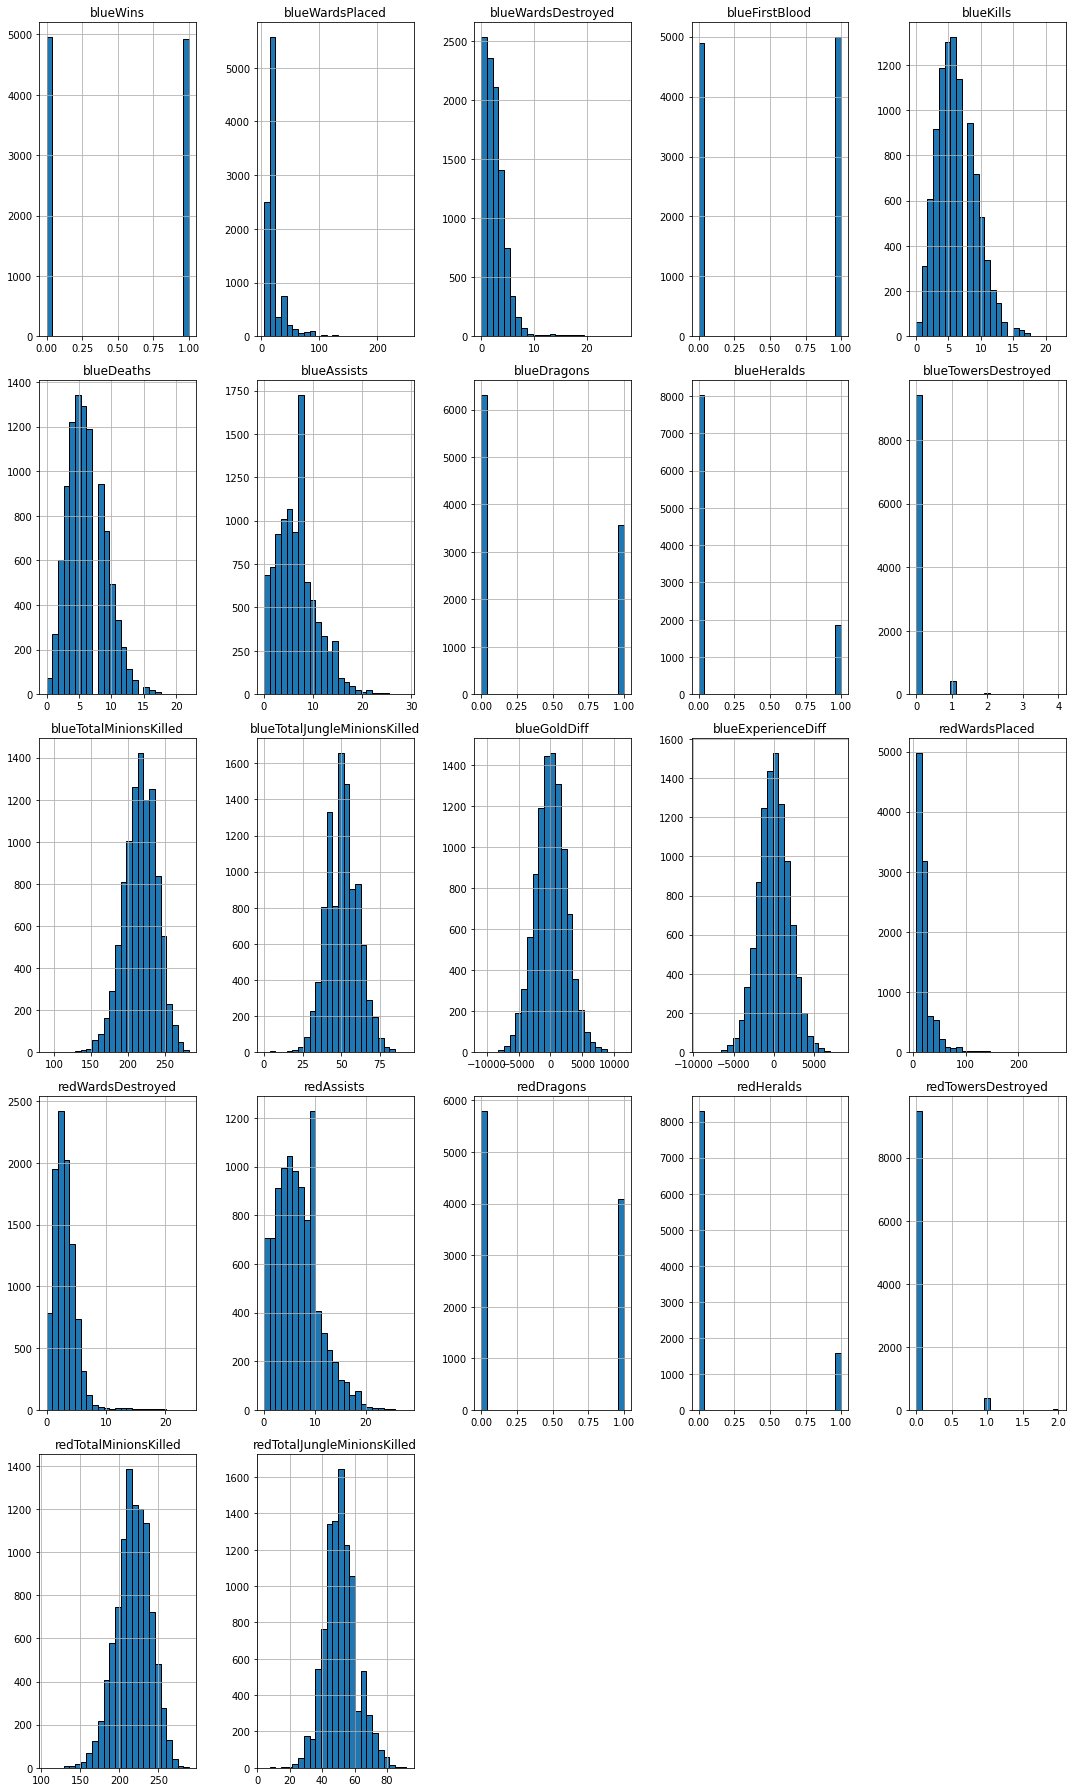

In [ ]:
# Investigating Distributions of Variables
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [ ]:
# There are curious values in terms of wards placed
# you are able to place 1 ward every 90 seconds, you can also buy additional wards for 75g.
# remember there are 5 players per team that are all able to place wards

# If 90 sec thing is true 
# Just using time as a limiting factor, the most amount of wards that can be placed 
# on the field by a whole team in 10 minutes is 33.

In [ ]:
# Looking at the average amount of wards placed

np.mean(df['blueWardsPlaced'])

22.28828828828829

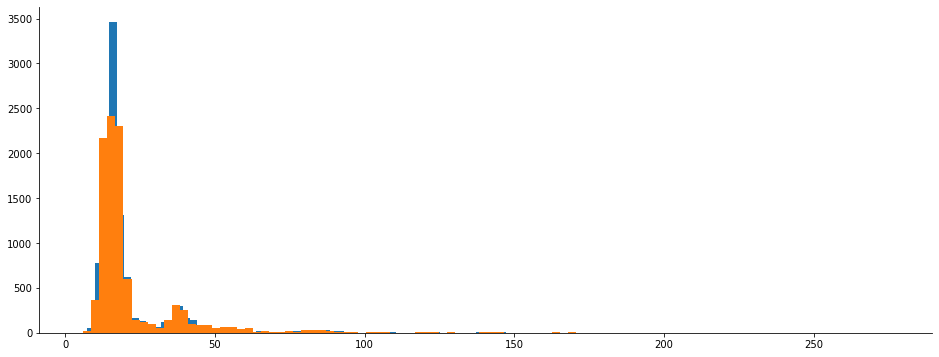

In [ ]:
# graphing distribution of wards placed
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

plt.hist(df['blueWardsPlaced'], bins=100);
plt.hist(df['redWardsPlaced'], bins=100);

In [ ]:
# at the max value we see players placing 50 wards over the course of 10 mins, so 5 wards per minute.
# there may be a way for this to be possible, but this is definitely not optimal play
# something in is going on in this games w super high ward placement numbers
max(df['blueWardsPlaced'])/5

50.0

In [ ]:
# Just checking the correlation between wards placed by one team and destroyed by the other

df['blueWardsPlaced'].corr(df['redWardsDestroyed'])

0.11554894429119933

In [ ]:
# How many records include values that are 3 times higher than the mean
sum(df['blueWardsPlaced']>(3*np.mean(df['blueWardsPlaced'])))

334

In [ ]:
# getting z scores
from scipy import stats
df['ward_z'] = np.abs(stats.zscore(df['blueWardsPlaced']))
df['redward_z'] = np.abs(stats.zscore(df['redWardsPlaced']))

In [ ]:
# examining values of higher z scores
print(sum(df['ward_z']>4))
df[df['ward_z']>8]

116


blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
3742         0              221                   1               0   
5552         1              183                   2               0   
6116         0              209                   1               1   
6401         1              203                   2               1   
6405         0              198                   1               1   
6509         1              176                   1               0   
6983         0              167                   1               1   
8206         1              250                   4               1   
8498         1              185                   2               0   

      blueKills  blueDeaths  blueAssists  blueDragons  blueHeralds  \
3742          2          14            1            0            0   
5552          8          11            8            0            0   
6116          5           9            4            1            0   
6401          6           7           12            1            0   
6405          6           9            6            0            0   
6509          9           8           11            0            0   
6983          5           8            6            0            0   
8206         12          10           12            0            1   
8498         10          12            5            0            0   

      blueTowersDestroyed  blueTotalMinionsKilled  \
3742                    0                     172   
5552                    0                     168   
6116                    0                     210   
6401                    0                     235   
6405                    0                     231   
6509                    0                     234   
6983                    0                     206   
8206                    0                     209   
8498                    0                     184   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
3742                            32         -6707               -5252   
5552                            52          -590                 527   
6116                            44         -1678               -2431   
6401                            48           751                 615   
6405                            55          -991                -844   
6509                            33           395                -504   
6983                            52         -1729               -2105   
8206                            44          3067                 503   
8498                            52          -287                 255   

      redWardsPlaced  redWardsDestroyed  redAssists  redDragons  redHeralds  \
3742              31                  1          13           1           1   
5552              10                  0          10           0           0   
6116              14                  1           5           0           0   
6401              11                  2          11           0           0   
6405              12                  1           7           0           0   
6509              15                  3           9           0           0   
6983              18                  2           8           1           1   
8206              16                  1           6           1           0   
8498              27                  3           9           0           0   

      redTowersDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
3742                   0                    203                           55   
5552                   0                    186                           48   
6116                   0                    202                           52   
6401                   0                    210                           48   
6405                   0                    223                           40   
6509                   0                    188                        

In [ ]:
# examining values of higher z scores
print(sum(df['redward_z']>4))
df[df['redward_z']>8]

116


blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
1448         1               14                   3               1   
2426         1               18                   6               0   
2713         0               16                   3               0   
3383         1               16                   7               1   
3793         0               16                   2               0   
4134         0               15                   6               1   
4259         0               18                   0               1   
4847         0               10                   4               0   
5729         1               16                   4               0   
5964         1               20                   2               1   
6613         0               11                   2               1   
7057         1               68                   3               0   
7454         0               49                   4               1   
8046         0               12                   1               0   
8832         0               50                   1               1   
9350         1               14                   8               1   

      blueKills  blueDeaths  blueAssists  blueDragons  blueHeralds  \
1448         11           6           14            1            0   
2426          5           5            7            1            1   
2713          5           8            3            0            0   
3383          6           2            6            0            1   
3793          8           9            8            0            0   
4134          6           5            9            0            0   
4259         11           5            8            0            0   
4847          3          10            3            0            0   
5729         16           7           16            1            0   
5964          9           9            7            0            0   
6613          9          11           10            0            0   
7057          7           3            7            0            1   
7454          6           7           10            1            0   
8046          7          10            8            0            0   
8832          7           1            5            0            0   
9350          9           4            6            0            1   

      blueTowersDestroyed  blueTotalMinionsKilled  \
1448                    0                     195   
2426                    0                     226   
2713                    0                     223   
3383                    0                     235   
3793                    0                     206   
4134                    0                     227   
4259                    0                     243   
4847                    0                     215   
5729                    1                     192   
5964                    0                     189   
6613                    0                     154   
7057                    0                     219   
7454                    1                     187   
8046                    0                     204   
8832                    1                     225   
9350                    1                     230   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
1448                            54           250                 287   
2426                            68           980                 403   
2713                            44         -1578                -598   
3383                            62          2036                2773   
3793                            44         -1720               -1376   
4134                            48           318                 370   
4259                            47          3415                1887   
4847                            44         -2686               -2037   
5729                            44          3309         

In [ ]:
df.shape

(9879, 24)

In [ ]:
df['kill_z'] = np.abs(stats.zscore(df['blueKills']))

In [ ]:
print(sum(df['kill_z']>4))
df[df['kill_z']>4]

3


blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
8251         1               37                   4               0   
9551         1               15                   0               0   
9789         1               13                   0               0   

      blueKills  blueDeaths  blueAssists  blueDragons  blueHeralds  \
8251         19           3           25            0            0   
9551         19           4           22            1            0   
9789         22           6           29            0            1   

      blueTowersDestroyed  blueTotalMinionsKilled  \
8251                    1                     240   
9551                    0                     234   
9789                    1                     208   

      blueTotalJungleMinionsKilled  blueGoldDiff  blueExperienceDiff  \
8251                            48          8667                7645   
9551                            45          7154                6032   
9789                            23          7600                1865   

      redWardsPlaced  redWardsDestroyed  redAssists  redDragons  redHeralds  \
8251              15                  3           7           0           0   
9551              12                  0           5           0           1   
9789              15                  1           9           0           0   

      redTowersDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
8251                   0                    189                           46   
9551                   0                    189                           38   
9789                   0                    171                           58   

        ward_z  redward_z    kill_z  
8251  0.816489   0.399207  4.256594  
9551  0.404494   0.561751  4.256594  
9789  0.515493   0.399207  5.252982

In [ ]:
pd.set_option('max_rows',30)

In [ ]:
df.shape

(9879, 25)

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'redWardsPlaced', 'redWardsDestroyed', 'redAssists', 'redDragons',
       'redHeralds', 'redTowersDestroyed', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'ward_z', 'redward_z', 'kill_z'],
      dtype='object')

In [ ]:
# dropping the newly created z score columns
df = df.drop(columns=['ward_z','redward_z','kill_z'], axis=1)

In [ ]:
df.shape

(9879, 22)

In [ ]:
sum(df['redTowersDestroyed'])

425

In [ ]:
sum(df['blueTowersDestroyed'])

508

In [ ]:
# df1 = df1.loc[df1['redward_z'] <= 4] 
# np.abs(stats.zscore(df['blueWardsPlaced']))
# df[np.abs(stats.zscore(df.iloc[:,1])) <= 4]
# df = df[np.abs(stats.zscore(df.iloc[:,column])) <= 4]
# len(df.columns)

In [ ]:
df['blueWins'].nunique()

2

In [ ]:
# Removing outliers
# this loop goes through every column and computes the z score of each record
# it then drops every record where the z score is over 4 and prints the resulting shape
for column in df.columns:
  if df[column].nunique() > 5:
    df = df[np.abs(stats.zscore(df[column])) <= 4]
  print(column,df.shape)

blueWins (9879, 22)
blueWardsPlaced (9763, 22)
blueWardsDestroyed (9674, 22)
blueFirstBlood (9674, 22)
blueKills (9671, 22)
blueDeaths (9666, 22)
blueAssists (9641, 22)
blueDragons (9641, 22)
blueHeralds (9641, 22)
blueTowersDestroyed (9641, 22)
blueTotalMinionsKilled (9638, 22)
blueTotalJungleMinionsKilled (9631, 22)
blueGoldDiff (9630, 22)
blueExperienceDiff (9626, 22)
redWardsPlaced (9513, 22)
redWardsDestroyed (9423, 22)
redAssists (9407, 22)
redDragons (9407, 22)
redHeralds (9407, 22)
redTowersDestroyed (9407, 22)
redTotalMinionsKilled (9405, 22)
redTotalJungleMinionsKilled (9398, 22)


In [ ]:
# shape after removing outliers
df.shape

(9398, 22)

## Feature Relationships: Looking at Multi-Colinearity

Text(0.5, 1.0, 'Multi-Collinearity of Features')

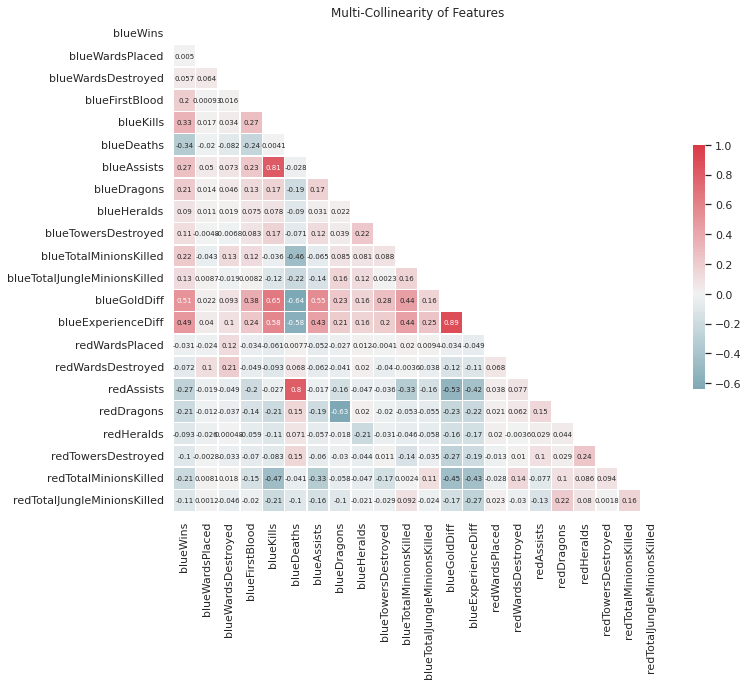

In [ ]:
sns.set(style="white")
corr = df.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5}, annot=True,annot_kws={"size":7})
ax.set_title('Multi-Collinearity of Features')

Three columns stand out.  Blue and Reds Assists and Experience Diff.
</br>
Given the high values for their correlations to other non target columns, we will be removing them.
</br>


In [ ]:
# saving a copy of the dataframe with assists and expdiff, just in case we want to revisit later
df1 = df
df1.head(2)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   

   blueDeaths  blueAssists  blueDragons  blueHeralds  blueTowersDestroyed  \
0           6           11            0            0                    0   
1           5            5            0            0                    0   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   

   blueExperienceDiff  redWardsPlaced  redWardsDestroyed  redAssists  \
0                  -8              15                  6           8   
1               -1173              12                  1           2   

   redDragons  redHeralds  redTowersDestroyed  redTotalMinionsKilled  \
0           0           0                   0                    197   
1           1           1                   1                    240   

   redTotalJungleMinionsKilled  
0                           55  
1                           52

In [ ]:
# Dropped the assists because of the multi-collinearity wtih blueKills and blueDeaths
# and blueExpDiff because of the multi-collinearity with blueGoldDiff


df = df.drop(columns=['blueAssists', 'redAssists', 'blueExperienceDiff'],axis=1)

In [ ]:
df.head(2)

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   

   blueDeaths  blueDragons  blueHeralds  blueTowersDestroyed  \
0           6            0            0                    0   
1           5            0            0                    0   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   

   redWardsPlaced  redWardsDestroyed  redDragons  redHeralds  \
0              15                  6           0           0   
1              12                  1           1           1   

   redTowersDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  
0                   0                    197                           55  
1                   1                    240                           52

In [ ]:
df.shape

(9398, 19)

## Encoding Categorical Data:

With the feature selection we made earlier we eliminated most of the categorical variables. In the most recent dataframe we only have blueFirstBlood and it was already in our dataset as a one hot encoded value. 

# Creating a Model

## Splitting the Data

In [ ]:
# df.iloc[:,1:]
# df.iloc[:,0]

In [ ]:
X,Y = df.iloc[:,1:], df.iloc[:,0]

NameError: ignored

In [ ]:
# splitting data 80/20
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)

## Algorithm Harness

In [ ]:
!pip install catboost

In [ ]:
# Compare Algorithms
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier

models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))
models.append(('CAT', CatBoostClassifier(verbose=0)))
models.append(('ADA', AdaBoostClassifier()))
models.append(('LGBM',LGBMClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Most Important Features Per XGBoost

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

In [ ]:
df_features = feature_imp(X, xgb_clf)
df_features.set_index('feature', inplace=True)
df_features.plot(kind='barh', figsize=(10, 8))
plt.title('Feature Importance according to XGBoost')

# XGBoost
attempting Bayesian Optimization for XGBoost

In [ ]:
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Baseline Model

In [ ]:
df.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueDragons  blueHeralds  blueTowersDestroyed  \
0           6            0            0                    0   
1           5            0            0                    0   
2          11            1            0                    0   
3           5            0            1                    0   
4           6            0            0                    0   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueGoldDiff  \
0                     195                            36           643   
1                     174                            43         -2908   
2                     186                            46         -1172   
3                     201                            55         -1321   
4                     210                            57         -1004   

   redWardsPlaced  redWardsDestroyed  redDragons  redHeralds  \
0              15                  6           0           0   
1              12                  1           1           1   
2              15                  3           0           0   
3              15                  2           0           0   
4              17                  2           1           0   

   redTowersDestroyed  redTotalMinionsKilled  redTotalJungleMinionsKilled  
0                   0                    197                           55  
1                   1                    240                           52  
2                   0                    203                           28  
3                   0                    235                           47  
4                   0                    225                           67

In [ ]:
df2 = df1.drop(columns=['blueAssists', 'redAssists'],axis=1)

In [ ]:
# splitting data 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2, random_state=22)


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier()

### Results:

In [ ]:
predictions_xgb = xgb_clf.predict(X_test)
confusion_matrix(y_test, predictions_xgb)

array([[716, 266],
       [242, 656]])

In [ ]:
# high_score = 725+662 - disregard
accuracy_score(y_test, predictions_xgb)

0.7297872340425532

In [ ]:
print(classification_report(y_test, predictions_xgb))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       982
           1       0.71      0.73      0.72       898

    accuracy                           0.73      1880
   macro avg       0.73      0.73      0.73      1880
weighted avg       0.73      0.73      0.73      1880



In [ ]:
# creating a dictionary to store scores of our models, pre and post tuning
dict_scores = {}
dict_scores[0] = {'Model': 'XGBoost', 'State': 'Pre-tuning', 'Accuracy': round(accuracy_score(y_test, predictions_xgb),4), 'AUC':round(roc_auc_score(y_test, predictions_xgb),4), 'Blue Win Accuracy':round(recall_score(predictions_xgb, y_test, pos_label=1),4), 'Red Win Accuracy':round(recall_score(predictions_xgb, y_test, pos_label=0),4)}
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474}}

## Tuning Hyperparameters using Bayesian Optimization

In [ ]:
# https://analyticsindiamag.com/implementing-bayesian-optimization-on-xgboost-a-beginners-guide/

#Converting the dataframe into XGBoost’s Dmatrix object
dtrain = xgb.DMatrix(X_train, label=y_train)

#Bayesian Optimization function for xgboost
#specify the parameters you want to tune as keyword arguments
def bo_tune_xgb(max_depth, gamma, n_estimators ,learning_rate, min_child_weight):
  params = {'max_depth': int(max_depth),
              'gamma': gamma,
              'n_estimators': int(n_estimators),
              'learning_rate':learning_rate,
              'min_child_weight':min_child_weight,
              'subsample': .8,
              'eta': 0.1,
              'eval_metric': 'error'}
  cv_result = xgb.cv(params, dtrain, num_boost_round=70, nfold=10)
    #Return the negative error
  return -1.0 * cv_result['test-error-mean'].iloc[-1]

#Invoking the Bayesian Optimizer with the specified parameters to tune
xgb_bo = BayesianOptimization(bo_tune_xgb, {'max_depth': (3, 10),
                                             'gamma': (0, 1),
                                             'learning_rate':(0,1),
                                             'n_estimators':(100,120),
                                             'min_child_weight':[1,5],
                                            })

#performing Bayesian optimization for 5 iterations with 8 steps of random exploration with an #acquisition function of expected improvement
xgb_bo.maximize(n_iter=6, init_points=8, acq='ei')

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------


<ipython-input-83-1fba0ed0d6e2>:30: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  xgb_bo.maximize(n_iter=6, init_points=8, acq='ei')


| 1         | -0.3113   | 0.2785    | 0.3316    | 8.63      | 3.023     | 113.6     |
| 2         | -0.2896   | 0.9434    | 0.1499    | 6.396     | 3.326     | 118.8     |
| 3         | -0.3289   | 0.359     | 0.4752    | 8.177     | 2.332     | 100.1     |
| 4         | -0.2845   | 0.4961    | 0.3033    | 3.824     | 1.489     | 103.0     |
| 5         | -0.3359   | 0.2471    | 0.9974    | 4.457     | 1.807     | 119.4     |
| 6         | -0.3521   | 0.5653    | 0.9498    | 7.713     | 3.99      | 116.0     |
| 7         | -0.2941   | 0.917     | 0.5038    | 4.445     | 2.382     | 119.3     |
| 8         | -0.313    | 0.5736    | 0.4535    | 5.179     | 4.969     | 100.4     |
| 9         | -0.334    | 0.9058    | 0.7891    | 8.955     | 4.69      | 111.2     |
| 10        | -0.3011   | 0.9683    | 0.3659    | 7.091     | 4.904     | 106.4     |
| 11        | -0.3723   | 0.1356    | 0.9545    | 9.16      | 2.244     | 119.7     |
| 12        | -0.327    | 0.1693    | 0.842     | 4.55

In [ ]:
#Extracting the best parameters
params = xgb_bo.max['params']
print(params)

{'gamma': 0.4960575794133504, 'learning_rate': 0.3033085785979489, 'max_depth': 3.8237297523072638, 'min_child_weight': 1.4894628242414023, 'n_estimators': 103.03406485813582}


In [ ]:
#Converting the max_depth and n_estimator values from float to int
params['max_depth']= int(params['max_depth'])
params['n_estimators']= int(params['n_estimators'])

In [ ]:
#Initialize an XGBClassifier with the tuned parameters and fit the training data
classifier2 = XGBClassifier(**params).fit(X_train, y_train)

### Results:

In [ ]:
predictions_xgb2 = classifier2.predict(X_test)
print(classification_report(y_test, predictions_xgb2))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       982
           1       0.71      0.74      0.72       898

    accuracy                           0.73      1880
   macro avg       0.73      0.73      0.73      1880
weighted avg       0.73      0.73      0.73      1880



In [ ]:
confusion_matrix(y_test, predictions_xgb2)

array([[712, 270],
       [237, 661]])

In [ ]:
# storing scores in a dictionary
dict_scores[1] = {'Model': 'XGBoost', 'State': 'Post-tuning', 'Accuracy': round(accuracy_score(y_test, predictions_xgb2),4), 'AUC':round(roc_auc_score(y_test, predictions_xgb2),4), 'Blue Win Accuracy':round(recall_score(predictions_xgb2, y_test, pos_label=1),4), 'Red Win Accuracy':round(recall_score(predictions_xgb2, y_test, pos_label=0),4)}
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474},
 1: {'Model': 'XGBoost',
  'State': 'Post-tuning',
  'Accuracy': 0.7303,
  'AUC': 0.7306,
  'Blue Win Accuracy': 0.71,
  'Red Win Accuracy': 0.7503}}

In [ ]:
# disregard, for personal use
high_score2 = (721+661)
706+663

1369

## Tuning Hyperparameters using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimators = np.arange(100,200,5)
depth = np.arange(1,11,1)
param_test = {
 'n_estimators':estimators,
 'max_depth':depth,
 'min_child_weight':[1,2,3,4,5],
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)],
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

In [ ]:
params

{'gamma': 0.4960575794133504,
 'learning_rate': 0.3033085785979489,
 'max_depth': 3,
 'min_child_weight': 1.4894628242414023,
 'n_estimators': 103}

In [ ]:
param_test = {
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate=0.02822659452140064, n_estimators=118, max_depth=4,
 min_child_weight=3, gamma=0.5831229908326606, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='accuracy',n_jobs=4,cv=5)

In [ ]:
gsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     gamma=0.5831229908326606,
                                     learning_rate=0.02822659452140064,
                                     max_depth=4, min_child_weight=3,
                                     n_estimators=118, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.7}, 0.7255918128282443)

In [ ]:
param_test2 = {
 'subsample':[i/100.0 for i in range(65,80,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.02822659452140064, n_estimators=118, max_depth=4,
 min_child_weight=3, gamma=0.5831229908326606, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test, scoring='accuracy',n_jobs=4,cv=5)

In [ ]:
gsearch2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8,
                                     gamma=0.5831229908326606,
                                     learning_rate=0.02822659452140064,
                                     max_depth=4, min_child_weight=3,
                                     n_estimators=118, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
gsearch2.best_params_, gsearch.best_score_

({'colsample_bytree': 0.8, 'subsample': 0.7}, 0.7255918128282443)

In [ ]:
params

{'gamma': 0.4960575794133504,
 'learning_rate': 0.3033085785979489,
 'max_depth': 3,
 'min_child_weight': 1.4894628242414023,
 'n_estimators': 103}

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.02822659452140064,
 n_estimators=118,
 max_depth=4,
 min_child_weight=3.4208225590655257,
 gamma=0.5831229908326606,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [ ]:
xgb1.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.8, gamma=0.5831229908326606,
              learning_rate=0.02822659452140064, max_depth=4,
              min_child_weight=3.4208225590655257, n_estimators=118, nthread=4,
              seed=27, subsample=0.8)

In [ ]:
y_pred = xgb1.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)  

array([[711, 271],
       [247, 651]])

In [ ]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73       982
           1       0.71      0.72      0.72       898

    accuracy                           0.72      1880
   macro avg       0.72      0.72      0.72      1880
weighted avg       0.72      0.72      0.72      1880



### Note:
This section was done as more of a personal curiousity to see if I could get similar/better results than I did with Bayesian Optimization.  And also as a means to make sure I implemented Bayesian Optimization properly.  My conclusions were that, tuning using gridsearch took a lot longer and was producing worse results.

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import sklearn

In [ ]:
pipeline_lr = make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000))

In [ ]:
hyperparam_grid = {
    'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logisticregression__penalty': ['l2'],
    'logisticregression__C' : [100, 10, 1.0, 0.1, 0.01]
}

In [ ]:
pipe_grid_lr = GridSearchCV(pipeline_lr, param_grid=hyperparam_grid, cv=10, scoring='f1')

In [ ]:
LogisticRegression().get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
pipe_grid_lr.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=5000))]),
             param_grid={'logisticregression__C': [100, 10, 1.0, 0.1, 0.01],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             scoring='f1')

In [ ]:
pipe_grid_lr.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'newton-cg'}

In [ ]:
pipeline_lr_tuned = make_pipeline(StandardScaler(),LogisticRegression(solver = 'newton-cg', penalty= 'l2', C= 0.01, max_iter = 5000))

In [ ]:
pipeline_lr_tuned.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=5000,
                                    solver='newton-cg'))])

In [ ]:
y_pred_lr = pipeline_lr_tuned.predict(X_test)

## Results:

In [ ]:
confusion_matrix(y_test, y_pred_lr)

array([[711, 271],
       [233, 665]])

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.72      0.74       982
           1       0.71      0.74      0.73       898

    accuracy                           0.73      1880
   macro avg       0.73      0.73      0.73      1880
weighted avg       0.73      0.73      0.73      1880



In [ ]:
# storing scores in a dictionary
dict_scores[2] = {'Model': 'Logistic Regression', 'State': 'Post-tuning', 'Accuracy': round(accuracy_score(y_test, y_pred_lr),4), 'AUC':round(roc_auc_score(y_test, y_pred_lr),4), 'Blue Win Accuracy':round(recall_score(y_test, y_pred_lr, pos_label=1),4), 'Red Win Accuracy':round(recall_score(y_test, y_pred_lr, pos_label=0),4)}
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474},
 1: {'Model': 'XGBoost',
  'State': 'Post-tuning',
  'Accuracy': 0.7303,
  'AUC': 0.7306,
  'Blue Win Accuracy': 0.71,
  'Red Win Accuracy': 0.7503},
 2: {'Model': 'Logistic Regression',
  'State': 'Post-tuning',
  'Accuracy': 0.7319,
  'AUC': 0.7323,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.724}}

# Logistic Regression with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df = df.copy()

In [ ]:
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [ ]:
pca = PCA(n_components= .80)

In [ ]:
pca_fit = pca.fit(scaled_df)

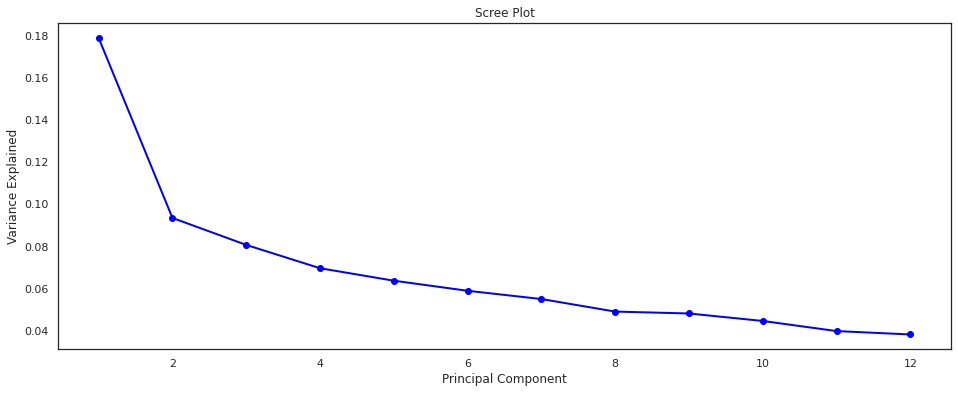

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
print(pca.explained_variance_ratio_)

[0.1788164  0.09353413 0.08076025 0.0697125  0.06381169 0.05902618
 0.05511818 0.04917429 0.04827326 0.04472757 0.03993771 0.03832621]


In [ ]:
pipeline_lr_tuned_pca = make_pipeline(StandardScaler(), PCA(.80), LogisticRegression(solver = 'newton-cg', penalty= 'l2', C= 0.01, max_iter = 5000))

In [ ]:
pipeline_lr_tuned_pca.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.8)),
                ('logisticregression',
                 LogisticRegression(C=0.01, max_iter=5000,
                                    solver='newton-cg'))])

In [ ]:
y_pred_pca = pipeline_lr_tuned_pca.predict(X_test)

## Results:

In [ ]:
confusion_matrix(y_test, y_pred_pca)

array([[710, 272],
       [242, 656]])

In [ ]:
print(classification_report(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73       982
           1       0.71      0.73      0.72       898

    accuracy                           0.73      1880
   macro avg       0.73      0.73      0.73      1880
weighted avg       0.73      0.73      0.73      1880



In [ ]:
# storing scores in a dictionary
dict_scores[3] = {'Model': 'Logistic Regression', 'State': 'PCA', 'Accuracy': round(accuracy_score(y_test, y_pred_pca),4), 'AUC':round(roc_auc_score(y_test, y_pred_pca),4), 'Blue Win Accuracy':round(recall_score(y_test, y_pred_pca,pos_label=1),4), 'Red Win Accuracy':round(recall_score(y_test, y_pred_pca,pos_label=0),4)}
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474},
 1: {'Model': 'XGBoost',
  'State': 'Post-tuning',
  'Accuracy': 0.7303,
  'AUC': 0.7306,
  'Blue Win Accuracy': 0.71,
  'Red Win Accuracy': 0.7503},
 2: {'Model': 'Logistic Regression',
  'State': 'Post-tuning',
  'Accuracy': 0.7319,
  'AUC': 0.7323,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.724},
 3: {'Model': 'Logistic Regression',
  'State': 'PCA',
  'Accuracy': 0.7266,
  'AUC': 0.7268,
  'Blue Win Accuracy': 0.7305,
  'Red Win Accuracy': 0.723}}

# LDA

In [ ]:
# creating an array for shrinkage to tune
shrinkage_parameter= np.linspace(0, 1, 21)
shrinkage_parameter

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [ ]:
# setting up hyperparamters to tune
hyperparam_grid = {
    'shrinkage': shrinkage_parameter,
    'solver': ['lsqr', 'eigen'] 
}

In [ ]:
# creating model to tune
grid_search_lda= GridSearchCV(estimator= LinearDiscriminantAnalysis(), param_grid=hyperparam_grid, cv=10, scoring='accuracy')

In [ ]:
# fitting
grid_search_lda.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                         'solver': ['lsqr', 'eigen']},
             scoring='accuracy')

In [ ]:
# best params
grid_search_lda.best_params_

{'shrinkage': 0.0, 'solver': 'lsqr'}

In [ ]:
# creating new model
lda_model = LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

In [ ]:
lda_model.fit(X_train, y_train)

LinearDiscriminantAnalysis(shrinkage=0, solver='lsqr')

In [ ]:
y_pred_lda = lda_model.predict(X_test)

## Results:

In [ ]:
confusion_matrix(y_test, y_pred_lda)

array([[715, 267],
       [233, 665]])

In [ ]:
print(classification_report(y_test, y_pred_lda))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       982
           1       0.71      0.74      0.73       898

    accuracy                           0.73      1880
   macro avg       0.73      0.73      0.73      1880
weighted avg       0.73      0.73      0.73      1880



In [ ]:
# storing scores in a dictionary
dict_scores[4] = {'Model': 'LDA', 'State': 'Post-tuning', 'Accuracy': round(accuracy_score(y_test, y_pred_lda),4), 'AUC':round(roc_auc_score(y_test, y_pred_lda),4), 'Blue Win Accuracy':round(recall_score(y_test, y_pred_lda, pos_label=1),4), 'Red Win Accuracy':round(recall_score(y_test,  y_pred_lda, pos_label=0),4)}
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474},
 1: {'Model': 'XGBoost',
  'State': 'Post-tuning',
  'Accuracy': 0.7303,
  'AUC': 0.7306,
  'Blue Win Accuracy': 0.71,
  'Red Win Accuracy': 0.7503},
 2: {'Model': 'Logistic Regression',
  'State': 'Post-tuning',
  'Accuracy': 0.7319,
  'AUC': 0.7323,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.724},
 3: {'Model': 'Logistic Regression',
  'State': 'PCA',
  'Accuracy': 0.7266,
  'AUC': 0.7268,
  'Blue Win Accuracy': 0.7305,
  'Red Win Accuracy': 0.723},
 4: {'Model': 'LDA',
  'State': 'Post-tuning',
  'Accuracy': 0.734,
  'AUC': 0.7343,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.7281}}

## Adjusting Probability Threshold
Checking a hypothesis that the probability threshold is skewed towards blue, and maybe this should be adjusted for

In [ ]:
# we'll check probabilities slight above and below .5
array_prob= np.arange(0.495, 0.505, 0.001)

In [ ]:
prob_yes= lda_model.predict_proba(X_test)[:,1]

In [ ]:
dict_predictions = dict()
dict_accuracy_scores= dict()

In [ ]:
for j in array_prob:
    dict_predictions[j]=np.empty(y_test.size, dtype=int)
    for i in np.arange(0, dict_predictions[j].size):
        if prob_yes[i] > j:
            dict_predictions[j][i]= 1
        else:
            dict_predictions[j][i]= 0
    dict_accuracy_scores[j]= np.round (accuracy_score(y_test, dict_predictions[j]),4)

In [ ]:
dict_accuracy_scores

{0.495: 0.7314,
 0.496: 0.7319,
 0.497: 0.7335,
 0.498: 0.7346,
 0.499: 0.7346,
 0.5: 0.734,
 0.501: 0.7346,
 0.502: 0.7351,
 0.503: 0.7362,
 0.504: 0.7356,
 0.505: 0.7356}

In [ ]:
max(dict_accuracy_scores, key= dict_accuracy_scores.get)

0.503

In [ ]:
threshold = max(dict_accuracy_scores, key= dict_accuracy_scores.get)
y_pred_lda_th = (lda_model.predict_proba(X_test)[:,1]>=threshold).astype(int)

### Results:

In [ ]:
confusion_matrix(y_test, y_pred_lda_th)

array([[720, 262],
       [234, 664]])

In [ ]:
print(classification_report(y_test, y_pred_lda_th))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74       982
           1       0.72      0.74      0.73       898

    accuracy                           0.74      1880
   macro avg       0.74      0.74      0.74      1880
weighted avg       0.74      0.74      0.74      1880



# Testing the model

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'redWardsPlaced',
       'redWardsDestroyed', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

In [ ]:
data = [2,1,1,5,5,0,0,0,200,50,0,2,1,0,0,0,200,50]
df_test = pd.DataFrame(data).T
df_test.columns=['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'redWardsPlaced',
       'redWardsDestroyed', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']

In [ ]:
df_test.shape
df_test

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0                2                   1               1          5           5   

   blueDragons  blueHeralds  blueTowersDestroyed  blueTotalMinionsKilled  \
0            0            0                    0                     200   

   blueTotalJungleMinionsKilled  blueGoldDiff  redWardsPlaced  \
0                            50             0               2   

   redWardsDestroyed  redDragons  redHeralds  redTowersDestroyed  \
0                  1           0           0                   0   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  
0                    200                           50

In [ ]:
df_test['blueKills'][0] = 5
df_test['blueDeaths'][0] = 0

In [ ]:
df_test['blueTotalMinionsKilled'][0] = 100
df_test['redTotalMinionsKilled'][0]  = 200

In [ ]:
df_test['blueWardsPlaced'][0]=0

In [ ]:
df_test['blueTowersDestroyed'][0] = 0

In [ ]:
df_test

blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  blueDeaths  \
0                0                   1               1          5           0   

   blueDragons  blueHeralds  blueTowersDestroyed  blueTotalMinionsKilled  \
0            0            0                    0                     100   

   blueTotalJungleMinionsKilled  blueGoldDiff  redWardsPlaced  \
0                            50             0               2   

   redWardsDestroyed  redDragons  redHeralds  redTowersDestroyed  \
0                  1           0           0                   0   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  
0                    200                           50

In [ ]:
lda_model.predict_proba(df_test)

array([[0.46287019, 0.53712981]])

# Saving the Best Model
(for use in our app)

In [ ]:
dict_scores

{0: {'Model': 'XGBoost',
  'State': 'Pre-tuning',
  'Accuracy': 0.7298,
  'AUC': 0.7298,
  'Blue Win Accuracy': 0.7115,
  'Red Win Accuracy': 0.7474},
 1: {'Model': 'XGBoost',
  'State': 'Post-tuning',
  'Accuracy': 0.7303,
  'AUC': 0.7306,
  'Blue Win Accuracy': 0.71,
  'Red Win Accuracy': 0.7503},
 2: {'Model': 'Logistic Regression',
  'State': 'Post-tuning',
  'Accuracy': 0.7319,
  'AUC': 0.7323,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.724},
 3: {'Model': 'Logistic Regression',
  'State': 'PCA',
  'Accuracy': 0.7266,
  'AUC': 0.7268,
  'Blue Win Accuracy': 0.7305,
  'Red Win Accuracy': 0.723},
 4: {'Model': 'LDA',
  'State': 'Post-tuning',
  'Accuracy': 0.734,
  'AUC': 0.7343,
  'Blue Win Accuracy': 0.7405,
  'Red Win Accuracy': 0.7281}}

In [ ]:
# saving performance metric scores to .csv file
scores = pd.DataFrame(dict_scores)
scores = scores.T
scores.to_csv('scores.csv')
scores

Model        State Accuracy     AUC Blue Win Accuracy  \
0              XGBoost   Pre-tuning   0.7298  0.7298            0.7115   
1              XGBoost  Post-tuning   0.7303  0.7306              0.71   
2  Logistic Regression  Post-tuning   0.7319  0.7323            0.7405   
3  Logistic Regression          PCA   0.7266  0.7268            0.7305   
4                  LDA  Post-tuning    0.734  0.7343            0.7405   

  Red Win Accuracy  
0           0.7474  
1           0.7503  
2            0.724  
3            0.723  
4           0.7281

In [ ]:
# .save_model is only an attribute for xgboost models, attempting to save the lda model as a pickle
import pickle
# saving file
pkl_filename = 'lda_save.pkl'
with(open(pkl_filename, 'wb')) as file:
  pickle.dump(lda_model, file)

In [ ]:
classifier2.save_model('xgb_model.json')

# Making the Game Prediction App

In [ ]:
# installing and initializing streamlit
!pip install -q streamlit
!pip install pyngrok
!ngrok authtoken streamlit_authorization_code_here
from pyngrok import ngrok 
public_url = ngrok.connect(port='8501')
public_url

     |████████████████████████████████| 9.2 MB 9.6 MB/s 
     |████████████████████████████████| 237 kB 53.6 MB/s 
     |████████████████████████████████| 182 kB 47.6 MB/s 
     |████████████████████████████████| 4.7 MB 54.8 MB/s 
     |████████████████████████████████| 78 kB 7.6 MB/s 
     |████████████████████████████████| 164 kB 62.6 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 761 kB 6.8 MB/s 
  Created wheel for pyngrok: filename=pyngrok-5.2.1-py3-none-any.whl size=19792 sha256=8dcf7e3620b581e3f7165084bdf32020e20147544e32dbcf6f11f12124ed969a
  Stored in directory: /root/.cache/pip/wheels/5d/f2/70/526da675d32f17577ec47ac4c663084efe39d47c826b6c3bb1
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


<NgrokTunnel: "http://9dbf-34-125-152-240.ngrok.io" -> "http://localhost:80">

In [ ]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'redWardsPlaced',
       'redWardsDestroyed', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled'],
      dtype='object')

## APP Code

In [ ]:
%%writefile LOL_app.py 
import xgboost as xgb
import streamlit as st
import pandas as pd

#Loading up the Regression model we created
model = xgb.XGBRegressor()
model.load_model('xgb_model.json')

#Caching the model for faster loading
@st.cache


# Define the prediction function
def predict(wardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueTowersDestroyed, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, redTowersDestroyed, redTotalMinionsKilled, redTotalJungleMinionsKilled, firstDragon, firstHerald, wardsPlaced):
    #Predicting the winner
    if blueFirstBlood == 'Blue':
        blueFirstBlood = 1
    elif blueFirstBlood == 'Red':
        blueFirstBlood = 0
        blueGoldDiff = blueGoldDiff - 150

    if firstDragon == 'Blue':
        blueDragons, redDragons= 1,0
    elif firstDragon == 'Red':
        blueDragons, redDragons= 0,1
    elif firstDragon == 'None':
        blueDragons, redDragons= 0,0
    
    if firstHerald == 'Blue':
        blueHeralds, redHeralds= 1,0
    elif firstHerald == 'Red':
        blueHeralds, redHeralds= 0,1
    elif firstHerald == 'None':
        blueHeralds, redHeralds= 0,0

    if wardsPlaced == 'Blue':
        blueWardsPlaced, redWardsPlaced= 50,10
    elif wardsPlaced  == 'Red':
        blueWardsPlaced, redWardsPlaced= 10,50
    elif wardsPlaced  == 'Even':
        blueWardsPlaced, redWardsPlaced= 20,20

    if wardsDestroyed == 'Blue':
        blueWardsDestroyed, redWardsDestroyed= 0,10
    elif wardsDestroyed  == 'Red':
        blueWardsDestroyed, redWardsDestroyed= 10,0
    elif wardsDestroyed  == 'Even':
        blueWardsDestroyed, redWardsDestroyed= 2,2

    prediction = model.predict(pd.DataFrame([[blueWardsPlaced, blueWardsDestroyed, blueFirstBlood,blueKills, blueDeaths, blueDragons, blueHeralds,blueTowersDestroyed, blueTotalMinionsKilled,blueTotalJungleMinionsKilled, blueGoldDiff, redWardsPlaced,redWardsDestroyed, redDragons, redHeralds, redTowersDestroyed,redTotalMinionsKilled, redTotalJungleMinionsKilled]], columns=['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood','blueKills', 'blueDeaths', 'blueDragons', 'blueHeralds','blueTowersDestroyed', 'blueTotalMinionsKilled','blueTotalJungleMinionsKilled', 'blueGoldDiff', 'redWardsPlaced','redWardsDestroyed', 'redDragons', 'redHeralds', 'redTowersDestroyed','redTotalMinionsKilled', 'redTotalJungleMinionsKilled']))
    if prediction>=.5:
      result = 'Blue Side'
      return result,prediction
    else:
      result = 'Red Side'
      return result,prediction

st.markdown("<h2 style='text-align: center; color: black;'>Leauge Of Legends Game Outcome Predictor</h2>", unsafe_allow_html=True)
st.markdown("<h3 style='text-align: center; color: blue;'>Who Will Win?</h3>", unsafe_allow_html=True)



st.image("""https://assets-prd.ignimgs.com/2021/12/14/leagueoflegends-1639513774570.jpg""")
st.markdown("<h1 style='text-align: center;'><u>League of Legends Game Winner Predictor</u></h1>", unsafe_allow_html=True)

st.header('Enter the game state statistics at 10 minutes:')
blueGoldDiff = st.number_input('Enter the Gold Difference (Blue team Ahead = positive):', min_value=-10000, max_value=10000, value=0)
blueKills = st.number_input('How many kills does Blue side have?', min_value=0, max_value=50, value=10)
blueDeaths = st.number_input('How many kills does Red side have?', min_value=0, max_value=50, value=10)
blueFirstBlood = st.selectbox('Who had first blood?', ['Blue', 'Red'])
firstDragon = st.selectbox('Who killed first dragon?', ['None','Blue', 'Red'])
firstHerald = st.selectbox('Who killed first herald?', ['None','Blue', 'Red'])
redTowersDestroyed =st.number_input('How many towers did Blue destroy?', min_value=0, max_value=5, value=1)
blueTowersDestroyed =st.number_input('How many towers did Red destroy?', min_value=0, max_value=5, value=1)
blueTotalMinionsKilled =st.number_input('How many total minions did Blue side kill?', min_value=130, max_value=280, value=216)
redTotalMinionsKilled =st.number_input('How many total minions did Red side kill?', min_value=130, max_value=280, value=216)
blueTotalJungleMinionsKilled =st.number_input('How many total Jungle minions did Blue side kill?', min_value=20, max_value=90, value=50)
redTotalJungleMinionsKilled =st.number_input('How many total Jungle minions did Red side kill?', min_value=20, max_value=90, value=50)
wardsPlaced = st.selectbox('Who placed more wards?', ['Even','Blue', 'Red'])
wardsDestroyed = st.selectbox('Who destroyed more wards?', ['Even','Blue', 'Red'])




if st.button('Predict the Winner'):
    winner,prediction = predict(wardsDestroyed, blueFirstBlood, blueKills, blueDeaths, blueTowersDestroyed, blueTotalMinionsKilled, blueTotalJungleMinionsKilled, blueGoldDiff, redTowersDestroyed, redTotalMinionsKilled, redTotalJungleMinionsKilled, firstDragon, firstHerald, wardsPlaced)
    st.success(f'The predicted winner is {winner}, {prediction}')

st.sidebar.image('https://www.leagueoflegends.com/static/open-graph-2e582ae9fae8b0b396ca46ff21fd47a8.jpg', width=250)
with st.sidebar:
    st.subheader('About')
    st.markdown('This dashboard is brought to you by Frank and Michael, using **Streamlit**')


# caching dataset
#@st.cache
#def load_data(path):
#    dataset = pd.read_csv(path)
#    return dataset
#car = load_data('https://raw.githubusercontent.com/fenago/datasets/main/car%20data.csv')

Writing LOL_app.py


## Running the app

In [ ]:
!streamlit run /content/LOL_app.py & npx localtunnel --port 8501

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 5, in <module>
    from streamlit.web.cli import main
  File "/usr/local/lib/python3.8/dist-packages/streamlit/__init__.py", line 55, in <module>
    from streamlit.delta_generator import DeltaGenerator as _DeltaGenerator
  File "/usr/local/lib/python3.8/dist-packages/streamlit/delta_generator.py", line 38, in <module>
    from streamlit import config, cursor, env_util, logger, runtime, type_util, util
  File "/usr/local/lib/python3.8/dist-packages/streamlit/cursor.py", line 18, in <module>
    from streamlit.runtime.scriptrunner import get_script_run_ctx
  File "/usr/local/lib/python3.8/dist-packages/streamlit/runtime/__init__.py", line 16, in <module>
    from streamlit.runtime.runtime import Runtime as Runtime
  File "/usr/local/lib/python3.8/dist-packages/streamlit/runtime/runtime.py", line 26, in <module>
    from streamlit.proto.BackMsg_pb2 import BackMsg
  File "/usr/local/lib/python3.8/dist-packages/stre

In [ ]:
np.mean(df['blueTotalJungleMinionsKilled'])
min(df['blueTotalJungleMinionsKilled'])


16

In [ ]:
max(df['redWardsDestroyed'])

11

# References
- https://towardsdatascience.com/bayesian-optimization-with-python-85c66df711ec
- https://coderzcolumn.com/tutorials/machine-learning/bayes-opt-bayesian-optimization-for-hyperparameters-tuning
- https://venturebeat.com/games/league-of-legends-worlds-2022-sets-peak-viewership-record/
- https://www.kaggle.com/datasets/bobbyscience/league-of-legends-diamond-ranked-games-10-min